In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from  sklearn.model_selection import train_test_split
import sklearn.metrics as sk
from sklearn.preprocessing import  LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.linear_model import  Ridge, Lasso
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.ensemble import GradientBoostingRegressor
from  sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from  sklearn.neighbors import  KNeighborsRegressor
from sklearn import svm

Read Data

In [2]:
data=pd.read_csv("Predict Price of Airline Tickets.csv")

Show data head

In [3]:
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

Show data info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Check nulls

In [5]:
data.isnull().value_counts()

Airline  Date_of_Journey  Source  Destination  Route  Dep_Time  Arrival_Time  Duration  Total_Stops  Additional_Info  Price
False    False            False   False        False  False     False         False     False        False            False    10682
                                               True   False     False         False     True         False            False        1
dtype: int64

Drop nulls

In [6]:
data.dropna(inplace=True)

Check duplicates

In [7]:
data.duplicated().value_counts()

False    10462
True       220
dtype: int64

Drop duplicates

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


Drop redundant columns

In [10]:
data.drop(['Route','Arrival_Time'],axis=1,inplace=True)

Drop Additional_info column -> major entries have no info

In [11]:
data['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [12]:
data.drop('Additional_Info',inplace=True,axis=1)

In [13]:
data['Date_of_Journey'].value_counts()

6/06/2019     490
18/05/2019    486
9/06/2019     485
12/06/2019    483
21/05/2019    482
9/05/2019     466
21/03/2019    412
15/05/2019    402
27/05/2019    369
27/06/2019    339
24/06/2019    330
1/06/2019     330
3/06/2019     326
15/06/2019    314
24/03/2019    314
6/03/2019     302
27/03/2019    290
24/05/2019    286
6/05/2019     281
1/05/2019     274
12/05/2019    259
1/04/2019     256
3/03/2019     217
9/03/2019     199
15/03/2019    162
18/03/2019    156
01/03/2019    151
12/03/2019    141
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    100
6/04/2019     100
06/03/2019     95
27/04/2019     94
24/04/2019     92
03/03/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [14]:
data['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Drop Airlines to enhance data distribution

In [15]:
data.drop(data[data['Airline']=='Trujet'].index,inplace=True)
data.drop(data[data['Airline']=='Vistara Premium economy'].index,inplace=True)
data.drop(data[data['Airline']=='Jet Airways Business'].index,inplace=True)
data.drop(data[data['Airline']=='Multiple carriers Premium economy'].index,inplace=True)

In [16]:
data['Duration'].value_counts()

2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
          ... 
30h 25m      1
30h 15m      1
42h 5m       1
28h 55m      1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

Drop row with duration 5 miniutes

In [17]:
data.drop(data[data['Duration']=='5m'].index,inplace=True)

Dep_Time to float

In [18]:
data['Dep_Time']=data['Dep_Time'].apply(lambda x: int(str(x).split(':')[0])+ int(str(x).split(':')[1]) / 60 )

In [19]:
data['Dep_Time'].describe()

count    10461.000000
mean        12.884866
std          5.731230
min          0.333333
25%          8.000000
50%         11.750000
75%         18.000000
max         23.916667
Name: Dep_Time, dtype: float64

<AxesSubplot:xlabel='Dep_Time', ylabel='Count'>

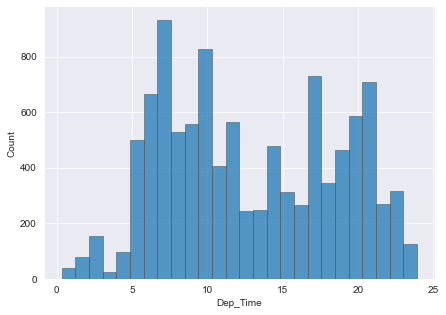

In [20]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(
    data,
    x='Dep_Time',
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,

)

change Duration to Float number

In [21]:
data['Duration']=data['Duration'].apply(lambda x: int(str(x).split(' ')[0].split('h')[0])+ int(str(x).split(' ')[1].split('m')[0]) / 60 if str(x).__contains__(' ')
else int(str(x).split('h')[0]) )


In [22]:
data['Duration'].value_counts()

2.833333     544
1.500000     386
2.750000     335
2.916667     332
2.583333     329
            ... 
36.416667      1
30.416667      1
30.250000      1
42.083333      1
47.666667      1
Name: Duration, Length: 367, dtype: int64

In [23]:
data['Duration'].describe()

count    10461.000000
mean        10.497355
std          8.344762
min          1.250000
25%          2.833333
50%          8.416667
75%         15.166667
max         47.666667
Name: Duration, dtype: float64

Check duration column distribution

<AxesSubplot:xlabel='Duration', ylabel='Count'>

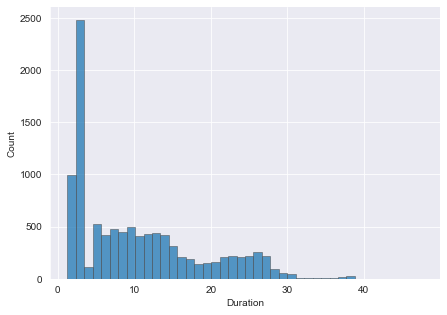

In [24]:

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(
    data,
    x='Duration',
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,

)

Drop some rows to enhance distribution

In [25]:
data.drop(data[data['Duration']>30].index,inplace=True)

<AxesSubplot:xlabel='Duration', ylabel='Count'>

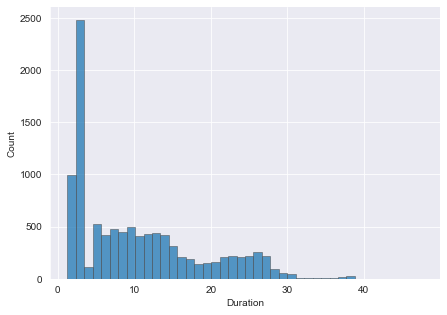

In [26]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(
    data,
    x='Duration',
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,

)

In [27]:
data.head(5)

Airline Date_of_Journey    Source Destination   Dep_Time   Duration  \
0       IndiGo      24/03/2019  Banglore   New Delhi  22.333333   2.833333   
1    Air India       1/05/2019   Kolkata    Banglore   5.833333   7.416667   
2  Jet Airways       9/06/2019     Delhi      Cochin   9.416667  19.000000   
3       IndiGo      12/05/2019   Kolkata    Banglore  18.083333   5.416667   
4       IndiGo      01/03/2019  Banglore   New Delhi  16.833333   4.750000   

  Total_Stops  Price  
0    non-stop   3897  
1     2 stops   7662  
2     2 stops  13882  
3      1 stop   6218  
4      1 stop  13302

Scaling Duration and price and Dep_Time columns

In [28]:
scaler = MinMaxScaler()
model=scaler.fit(data[['Duration','Price','Dep_Time']])
data[['Duration','Price','Dep_Time']]=model.transform(data[['Duration','Price','Dep_Time']])

In [29]:
data.head(5)

Airline Date_of_Journey    Source Destination  Dep_Time  Duration  \
0       IndiGo      24/03/2019  Banglore   New Delhi  0.932862  0.034111   
1    Air India       1/05/2019   Kolkata    Banglore  0.233216  0.132855   
2  Jet Airways       9/06/2019     Delhi      Cochin  0.385159  0.382406   
3       IndiGo      12/05/2019   Kolkata    Banglore  0.752650  0.089767   
4       IndiGo      01/03/2019  Banglore   New Delhi  0.699647  0.075404   

  Total_Stops     Price  
0    non-stop  0.027497  
1     2 stops  0.075920  
2     2 stops  0.155917  
3      1 stop  0.057348  
4      1 stop  0.148457

In [30]:
data['Price'].describe()

count    10461.000000
mean         0.093463
std          0.059475
min          0.000000
25%          0.044564
50%          0.083688
75%          0.136098
max          1.000000
Name: Price, dtype: float64

show price distribution

<AxesSubplot:xlabel='Price', ylabel='Count'>

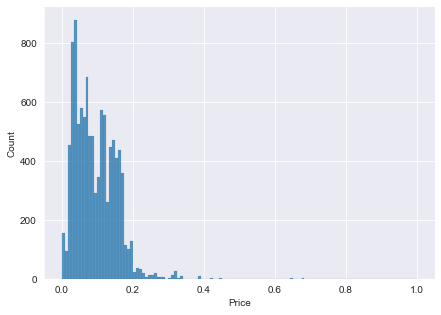

In [31]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(
    data,
    x='Price',
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.1,

)

Drop some entries to enhance distribution

In [32]:
data.drop(data[data['Price']>0.3].index,inplace=True)

Show distribution after drop

<AxesSubplot:xlabel='Price', ylabel='Count'>

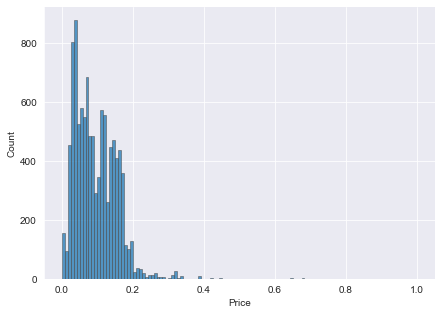

In [33]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(
    data,
    x='Price',
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,

)

In [34]:
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10461 entries, 0 to 10460
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10461 non-null  object 
 1   Date_of_Journey  10461 non-null  object 
 2   Source           10461 non-null  object 
 3   Destination      10461 non-null  object 
 4   Dep_Time         10461 non-null  float64
 5   Duration         10461 non-null  float64
 6   Total_Stops      10461 non-null  object 
 7   Price            10461 non-null  float64
dtypes: float64(3), object(5)
memory usage: 653.9+ KB


Label encoding for object types

In [36]:
label_encoder = LabelEncoder()
data['Airline']= label_encoder.fit_transform(data['Airline'])
data['Total_Stops'] = label_encoder.fit_transform(data['Total_Stops'] )
data['Destination']= label_encoder.fit_transform(data['Destination'])
data['Source']= label_encoder.fit_transform(data['Source'])

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10461 entries, 0 to 10460
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10461 non-null  int32  
 1   Date_of_Journey  10461 non-null  object 
 2   Source           10461 non-null  int32  
 3   Destination      10461 non-null  int32  
 4   Dep_Time         10461 non-null  float64
 5   Duration         10461 non-null  float64
 6   Total_Stops      10461 non-null  int32  
 7   Price            10461 non-null  float64
dtypes: float64(3), int32(4), object(1)
memory usage: 490.5+ KB


Preprocessing for Date_of_Journey column

In [38]:
data['Date_of_Journey'].apply(lambda x: int(str(x).split('/')[2])).value_counts()

2019    10461
Name: Date_of_Journey, dtype: int64

In [39]:
data['Date_of_Journey'].apply(lambda x: int(str(x).split('/')[1])).value_counts()

5    3395
6    3311
3    2677
4    1078
Name: Date_of_Journey, dtype: int64

In [40]:
data['Date_of_Journey'].apply(lambda x: int(str(x).split('/')[0])).value_counts()

9     1375
6     1267
27    1092
21    1085
1     1058
24    1022
15     967
12     946
3      835
18     814
Name: Date_of_Journey, dtype: int64

In [41]:
data['Date_of_Journey_day']=data['Date_of_Journey'].apply(lambda x: int(str(x).split('/')[0]))
data['Date_of_Journey_month']=data['Date_of_Journey'].apply(lambda x: int(str(x).split('/')[1]))
data.drop('Date_of_Journey',inplace=True,axis=1)

In [42]:
data.head()

Airline  Source  Destination  Dep_Time  Duration  Total_Stops     Price  \
0        3       0            5  0.932862  0.034111            4  0.027497   
1        1       3            0  0.233216  0.132855            1  0.075920   
2        4       2            1  0.385159  0.382406            1  0.155917   
3        3       3            0  0.752650  0.089767            0  0.057348   
4        3       0            5  0.699647  0.075404            0  0.148457   

   Date_of_Journey_day  Date_of_Journey_month  
0                   24                      3  
1                    1                      5  
2                    9                      6  
3                   12                      5  
4                    1                      3

Scaling Date of Journey

In [43]:
scaler = MinMaxScaler()
model=scaler.fit(data[['Date_of_Journey_day','Date_of_Journey_month']])
data[['Date_of_Journey_day','Date_of_Journey_month']]=model.transform(data[['Date_of_Journey_day','Date_of_Journey_month']])

In [44]:
data.head()

Airline  Source  Destination  Dep_Time  Duration  Total_Stops     Price  \
0        3       0            5  0.932862  0.034111            4  0.027497   
1        1       3            0  0.233216  0.132855            1  0.075920   
2        4       2            1  0.385159  0.382406            1  0.155917   
3        3       3            0  0.752650  0.089767            0  0.057348   
4        3       0            5  0.699647  0.075404            0  0.148457   

   Date_of_Journey_day  Date_of_Journey_month  
0             0.884615               0.000000  
1             0.000000               0.666667  
2             0.307692               1.000000  
3             0.423077               0.666667  
4             0.000000               0.000000

Split Data

In [45]:
x = data.drop('Price',axis=1)
y = data['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

Linear Regression Model

In [46]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
Linear_regression_pred = linear_regression.predict(x_test)
LR_score = sk.r2_score(y_test, Linear_regression_pred)

In [47]:
LR_score

0.38298658282144427

 Random Forest Model

In [197]:
random_forest = RandomForestRegressor(criterion='squared_error',max_features=None,min_samples_split=5,random_state=43)
random_forest.fit(x_train, y_train)
random_forest_pred = random_forest.predict(x_test)
random_forest_score=sk.r2_score(y_test, random_forest_pred)
random_forest_score

0.8168841176827033

In [196]:
parm_grid = [
    {

        'criterion': ['squared_error', 'absolute_error', 'poisson'],
        'max_features': ['sqrt', 'log2', None, 1.0],
        'min_samples_split':[2,3,4,5]
    }

]

log = GridSearchCV(random_forest, parm_grid, cv=3)

log.fit(x_train, y_train)
log.best_params_

{'criterion': 'squared_error', 'max_features': None, 'min_samples_split': 5}

Gradient Boost Model

In [166]:
GBC = GradientBoostingRegressor(criterion='squared_error',loss='squared_error',min_samples_split=3,max_features='auto',random_state=42)
GBC.fit(x_train, y_train)
GBC_Pred = GBC.predict(x_test)
GBC_Score=sk.r2_score(y_test, GBC_Pred)

In [129]:
parm_grid = [
    {
        'loss':['squared_error', 'absolute_error','huber','quantile'],
        'criterion':['friedman_mse', 'squared_error', 'mse'],
        'min_samples_split':[2,3,4,5],
        'max_features': ['sqrt', 'log2','auto',None]

    }

]

log = GridSearchCV(GBC, parm_grid, cv=4)

log.fit(x_train, y_train)
log.best_params_

C:\Users\hesha\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:471: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\tree\_classes.py:3

{'criterion': 'squared_error',
 'loss': 'squared_error',
 'max_features': 'auto',
 'min_samples_split': 3}

Decision Tree Model

In [176]:
treeReg = DecisionTreeRegressor(max_depth=10,max_features='auto',splitter='best',random_state=43)
treeReg.fit(x_train, y_train)
treeReg_pred = treeReg.predict(x_test)
treeReg_score = sk.r2_score(y_test, treeReg_pred)
treeReg_score*100

79.7493051585289

In [131]:
parm_grid = [
    {
        'max_depth': [1, 2, 3, 4, 5, None],
        'splitter': ['best', 'random'],
        'max_features': ['auto', 'sqrt', 'log2']
    }

]
log = GridSearchCV(treeReg, parm_grid, cv=3)
log.fit(x_train, y_train)
log.best_params_

{'max_depth': 5, 'max_features': 'auto', 'splitter': 'best'}

KNN Model

In [172]:
KNN=KNeighborsRegressor(algorithm='ball_tree',n_neighbors=11,p=1,weights='uniform')

In [173]:
KNN.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=11, p=1)

In [174]:
KNN_Pred=KNN.predict(x_test)

In [175]:
KNN_score=sk.r2_score(y_test,KNN_Pred)

In [136]:
KNN_score

0.7885752892693901

In [137]:
parm_grid = [
    {
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p':[1,2],
        'n_neighbors':[4,5,6,7,8,9,10]
}

]
log = GridSearchCV(KNN, parm_grid, cv=4)
log.fit(x_train, y_train)
log.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}

SVM Model

In [138]:
SVM=svm.SVR(gamma='auto',kernel='poly')

In [139]:
SVM.fit(x_train,y_train)

SVR(gamma='auto', kernel='poly')

In [140]:
SVM_Pred=SVM.predict(x_test)

In [141]:
SVM_Score=sk.r2_score(y_test,SVM_Pred)

In [142]:
SVM_Score

0.3719240044519808

In [143]:
parm_grid = [
    {
        'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma':['scale', 'auto'],

}

]
log = GridSearchCV(SVM, parm_grid, cv=2)
log.fit(x_train, y_train)
log.best_params_

{'gamma': 'auto', 'kernel': 'poly'}

Ridge Model

In [144]:
cross_val_scores_ridge = []

# List to maintain the different values of alpha
alpha = []

# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha=i * 0.25)
    ridgeModel.fit(x_train, y_train)
    scores = cross_val_score(ridgeModel, x, y, cv=10)
    avg_cross_val_score = mean(scores) * 100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i]) + ' : ' + str(cross_val_scores_ridge[i]))


0.25 : 47.99232742614825
0.5 : 47.99234347720097
0.75 : 47.99235433916851
1.0 : 47.99236003107926
1.25 : 47.99236057189066
1.5 : 47.99235598048949
1.75 : 47.992346275692185
2.0 : 47.992331476245084


In [145]:
ridgeModelChosen = Ridge(alpha=1)
ridgeModelChosen.fit(x_train, y_train)

# Evaluating the Ridge Regression model
RidgeScore=ridgeModelChosen.score(x_test, y_test)

Lasso Model

In [146]:
cross_val_scores_lasso = []

# List to maintain the different values of Lambda
Lambda = []

# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha=i * 0.25, tol=0.0925)
    lassoModel.fit(x_train, y_train)
    scores = cross_val_score(lassoModel, x, y, cv=10)
    avg_cross_val_score = mean(scores) * 100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i]) + ' : ' + str(cross_val_scores_lasso[i]))
# Building and fitting the Lasso Regression Model


0.25 : -0.16483240964462187
0.5 : -0.16483240964462187
0.75 : -0.16483240964462187
1.0 : -0.16483240964462187
1.25 : -0.16483240964462187
1.5 : -0.16483240964462187
1.75 : -0.16483240964462187
2.0 : -0.16483240964462187


In [147]:
lassoModelChosen = Lasso(alpha=1.5, tol=0.0925)
lassoModelChosen.fit(x_train, y_train)

# Evaluating the Lasso Regression model
LassoScore=lassoModelChosen.score(x_test, y_test)

Ada Boost Regressor Model

In [167]:
ABR=AdaBoostRegressor(random_state=43,n_estimators=50,loss='square',learning_rate=2.0)

In [168]:
ABR.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=2.0, loss='square', random_state=43)

In [169]:
ABR_Pred=ABR.predict(x_test)

In [170]:
ABR_Score=sk.r2_score(y_test,ABR_Pred)

In [171]:
ABR_Score

0.6686914290608099

In [153]:
parm_grid = [
    {
        'loss':['linear', 'square', 'exponential'],
        'learning_rate':[1.0,2.0,3.0],
        'n_estimators':[25,50,75,100],
        'random_state':[43,None]
    }

]
log = GridSearchCV(ABR, parm_grid, cv=3)
log.fit(x_train, y_train)
log.best_params_

{'learning_rate': 2.0,
 'loss': 'square',
 'n_estimators': 50,
 'random_state': None}

Polynomial Linear Regression Model

In [154]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4, include_bias=False)
poly_feature = poly.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.2, random_state=48)
linear_regression.fit(x_train, y_train)
pred = linear_regression.predict(x_test)
poly_score = sk.r2_score(y_test, pred)


Linear Regression Learning Curve

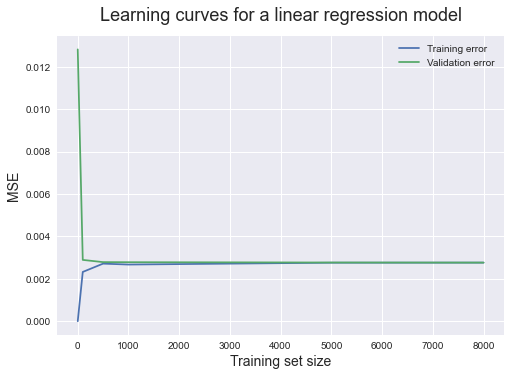

In [208]:
train_sizes = [1, 100, 500, 1000, 5000,8000]
train_sizes, train_scores, validation_scores = learning_curve(estimator=LinearRegression(), X=x, y=y,
                                                              train_sizes=train_sizes, cv=6,
                                                              scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a linear regression model', fontsize=18, y=1.03)
plt.legend()

Decision Tree Learning Curve

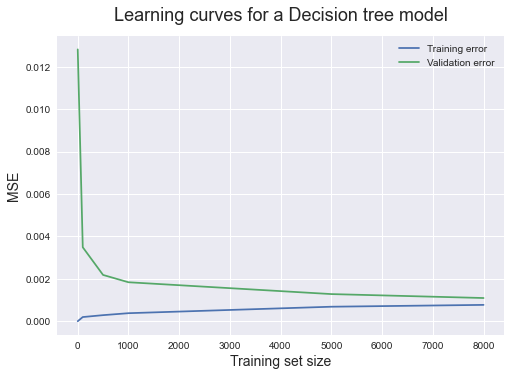

In [209]:
train_sizes = [1, 100, 500, 1000, 5000,8000]
train_sizes, train_scores, validation_scores = learning_curve(estimator=treeReg, X=x, y=y,
                                                              train_sizes=train_sizes, cv=6,
                                                              scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a Decision tree model', fontsize=18, y=1.03)
plt.legend()

GBR Learning Curve

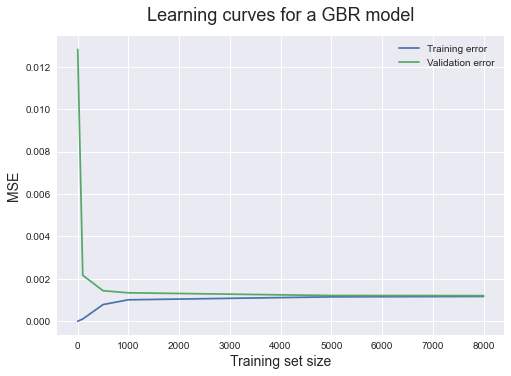

In [210]:
train_sizes = [1, 100, 500, 1000, 5000,8000]
train_sizes, train_scores, validation_scores = learning_curve(estimator=GBC, X=x, y=y,
                                                              train_sizes=train_sizes, cv=6,
                                                              scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a GBR model', fontsize=18, y=1.03)
plt.legend()

Ada Boost Learning Curve

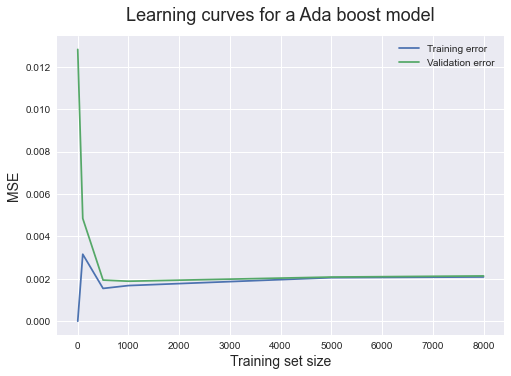

In [211]:
train_sizes = [1, 100, 500, 1000, 5000,8000]
train_sizes, train_scores, validation_scores = learning_curve(estimator=ABR, X=x, y=y,
                                                              train_sizes=train_sizes, cv=6,
                                                              scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a Ada boost model', fontsize=18, y=1.03)
plt.legend()

Lasso Model Learning Curve

C:\Users\hesha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, toleranc

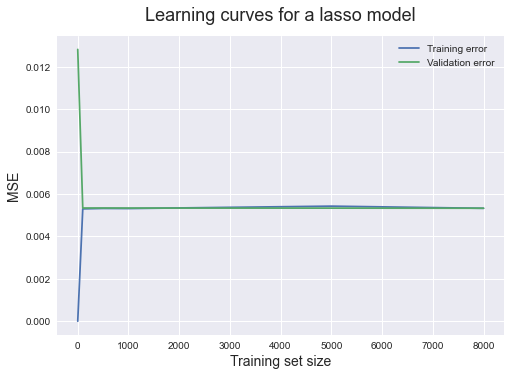

In [212]:
train_sizes = [1, 100, 500, 1000, 5000,8000]
train_sizes, train_scores, validation_scores = learning_curve(estimator=Lasso(), X=x, y=y,
                                                              train_sizes=train_sizes, cv=6,
                                                              scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a lasso model', fontsize=18, y=1.03)
plt.legend()

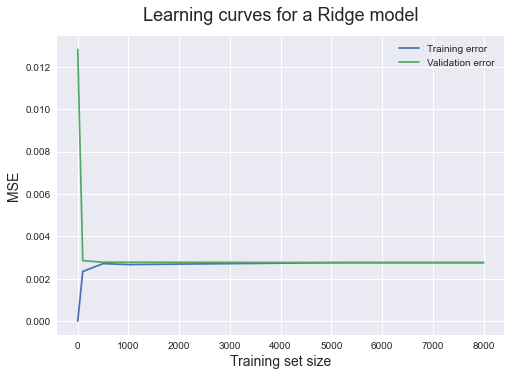

In [213]:
train_sizes = [1, 100, 500, 1000, 5000,8000]
train_sizes, train_scores, validation_scores = learning_curve(estimator=Ridge(), X=x, y=y,
                                                              train_sizes=train_sizes, cv=6,
                                                              scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a Ridge model', fontsize=18, y=1.03)
plt.legend()

Random Forest Learning Curve

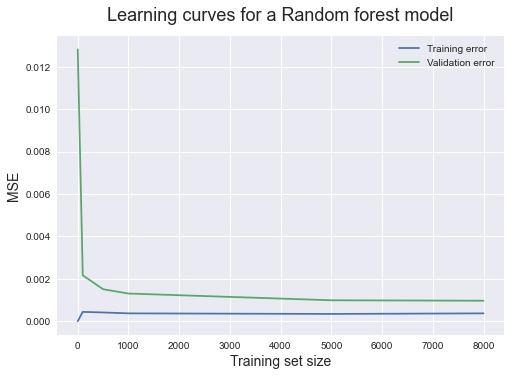

In [214]:
train_sizes = [1, 100, 500, 1000, 5000,8000]
train_sizes, train_scores, validation_scores = learning_curve(estimator=random_forest, X=x, y=y,
                                                              train_sizes=train_sizes, cv=6,
                                                              scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a Random forest model', fontsize=18, y=1.03)
plt.legend()

SVM Learning Curve

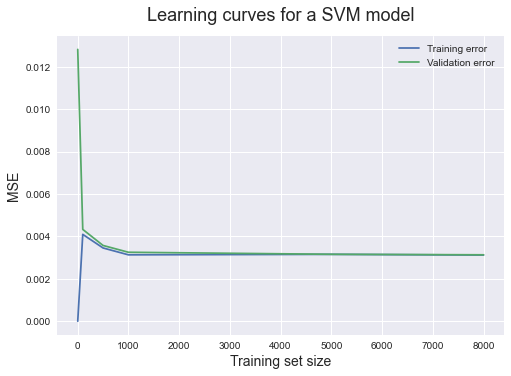

In [215]:
train_sizes = [1, 100, 500, 1000, 5000,8000]
train_sizes, train_scores, validation_scores = learning_curve(estimator=SVM, X=x, y=y,
                                                              train_sizes=train_sizes, cv=6,
                                                              scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a SVM model', fontsize=18, y=1.03)
plt.legend()

KNN Learning Curve

C:\Users\hesha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hesha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hesha\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\hesha\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\hesha\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\hesha\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "

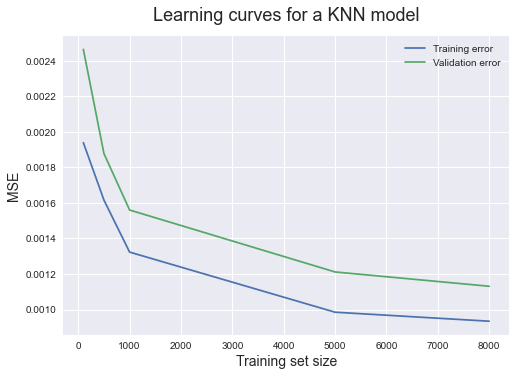

In [216]:
train_sizes = [1, 100, 500, 1000, 5000,8000]
train_sizes, train_scores, validation_scores = learning_curve(estimator=KNN, X=x, y=y,
                                                              train_sizes=train_sizes, cv=6,
                                                              scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a KNN model', fontsize=18, y=1.03)
plt.legend()

All Models Scores

In [217]:
print('Polynomial Linear Regression Score: {:.3f}%\n'.format(poly_score*100))
print('Linear Regression Score: {:.3f}%\n'.format(LR_score*100))
print('Random Forest Score: {:.3f}%\n'.format(random_forest_score*100))
print('Decision Tree Score: {:.3f}%\n'.format(treeReg_score*100))
print('Ridge Model Score: {:.3f}%\n'.format(RidgeScore*100))
print('Lasso Model Score: {:.3f}%\n'.format(LassoScore*100))
print('SVM Score: {:.3f}%\n'.format(SVM_Score*100))
print('GBR Score: {:.3f}%\n'.format(GBC_Score*100))
print('ABR Score: {:.3f}%\n'.format(ABR_Score*100))
print('KNN Score: {:.3f}%\n'.format(KNN_score*100))


Polynomial Linear Regression Score: 75.356%

Linear Regression Score: 48.260%

Random Forest Score: 81.688%

Decision Tree Score: 79.749%

Ridge Model Score: 48.256%

Lasso Model Score: -0.082%

SVM Score: 37.192%

GBR Score: 81.309%

ABR Score: 66.869%

KNN Score: 78.900%

